In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from obspy.taup import TauPyModel
import function_repo as fr
import importlib
importlib.reload(fr)

<module 'function_repo' from 'c:\\Users\\18723\\Documents\\GitHub\\SURG-Mars\\function_repo.py'>

In [2]:
# load normal-fault-guess.csv as a dataframe
df = pd.read_csv("normal_fault_guess.csv")
df.head()

,Theta,Phi,Alpha,Strike1,Dip1,Rake1,Strike2,Dip2,Rake2,OldWeight,Weight
0,133.672765,89.073231,115.107241,22.897605,51.420384,-124.211509,250.370388,49.723594,-54.822597,1.755011e-305,8.570164e-202
1,133.672765,89.073231,140.998938,8.372552,64.903724,-150.421627,264.837080,63.447689,-28.304078,0.000000e+00,0.000000e+00
2,133.672765,89.073231,26.115195,87.801715,71.911623,-20.529478,184.433557,70.527296,-160.772456,0.000000e+00,0.000000e+00
3,133.672765,89.073231,22.001126,88.787029,74.663101,-17.336330,183.506937,73.299533,-163.969931,0.000000e+00,0.000000e+00
4,133.672765,89.073231,69.608765,64.463302,49.053792,-63.886464,207.667598,47.294959,-116.898558,1.136393e-196,1.513833e-77


In [3]:
# weight is np.exp(-angle**2/(2*epsilon**2))

old_accepted1 = df["OldWeight"] >= np.exp(-1/2)
old_accepted2 = (df["OldWeight"] >= np.exp(-2)) & (df["OldWeight"] < np.exp(-1/2))
old_rejected = df["OldWeight"] < np.exp(-2)
accepted1 = df["Weight"] >= np.exp(-1/2)
accepted2 = (df["Weight"] >= np.exp(-2)) & (df["Weight"] < np.exp(-1/2))
rejected = df["Weight"] < np.exp(-2)

In [ ]:
# Plot the accepted and rejected guesses in 3D scatter plot
# Then plot pairwaise scatter plot of the accepted guesses
# Then beachballs of the accepted guesses, accounting for weight

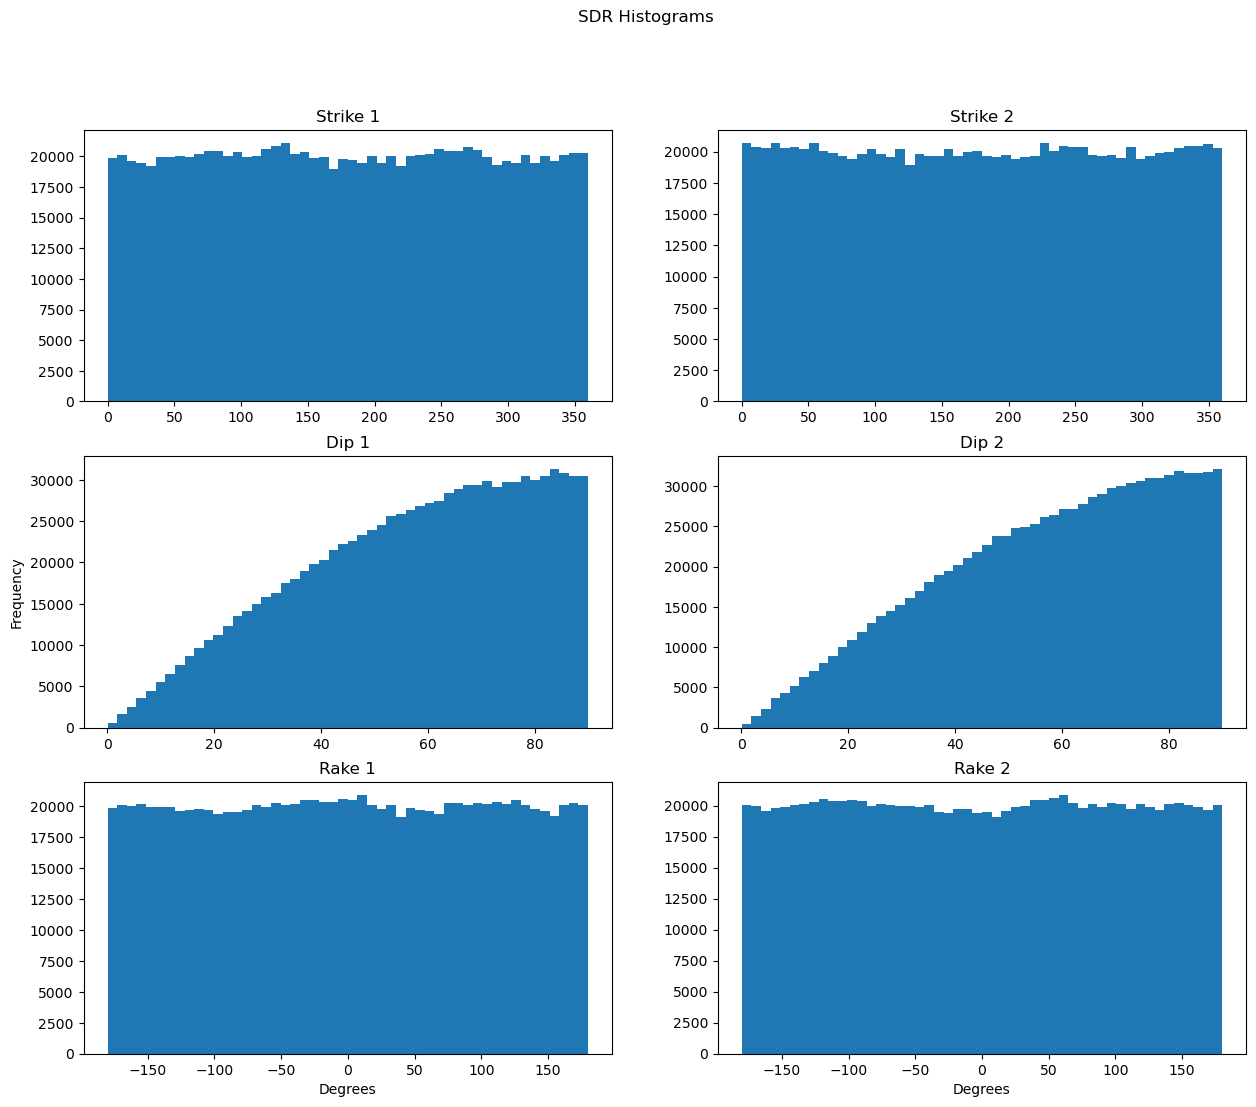

In [4]:
# histogram (sanity check)
fr.sdr_histograms(df)

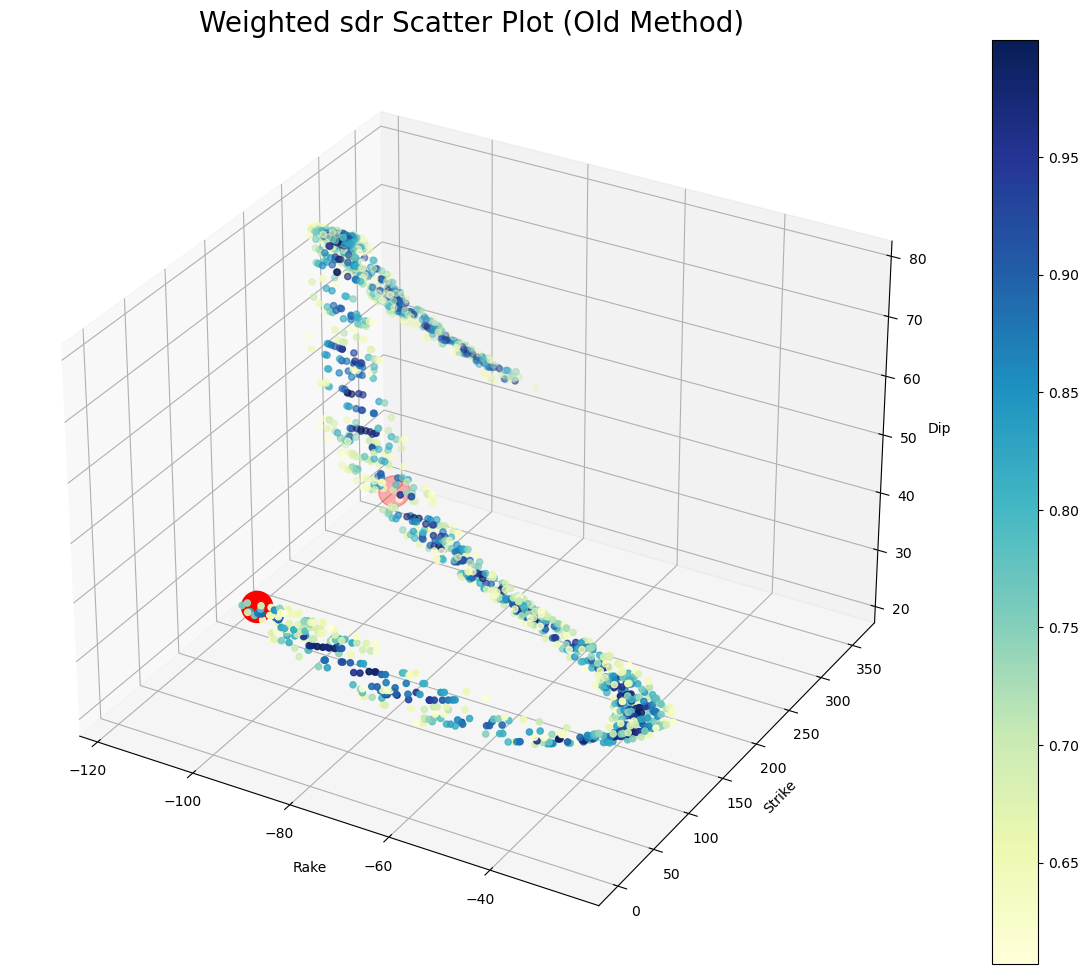

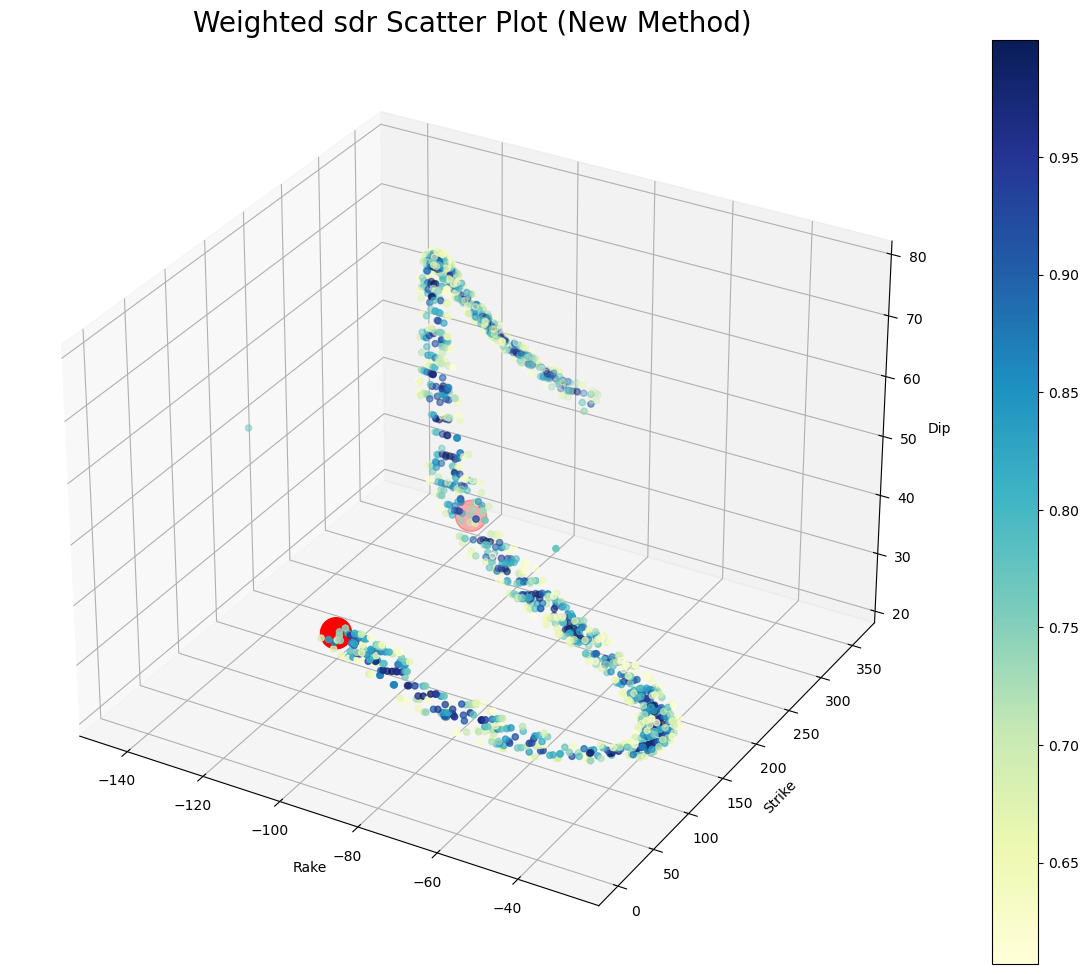

In [5]:
# 3D sdr scatter plot

# Ao = np.array([-0.81021954, -4.91714978, 2.19851802])
# Uo = np.array([0.02231451, 0.13542476, 0.06055007])
t, p = np.array([1,0,0]), np.array([0,0,1])
normal_faults = fr.tp2sdr(fr.coord_switch(t), fr.coord_switch(p))
normal_faults = np.rad2deg(np.array(normal_faults))

fr.weighted_3D_scatter(df[old_accepted1], "OldWeight", normal_faults)
fr.weighted_3D_scatter(df[accepted1], "Weight", normal_faults)

In [ ]:
# Explain the S-shape
# The red circles seem to be in the middle of the paths they came from
# Compare with weighted average

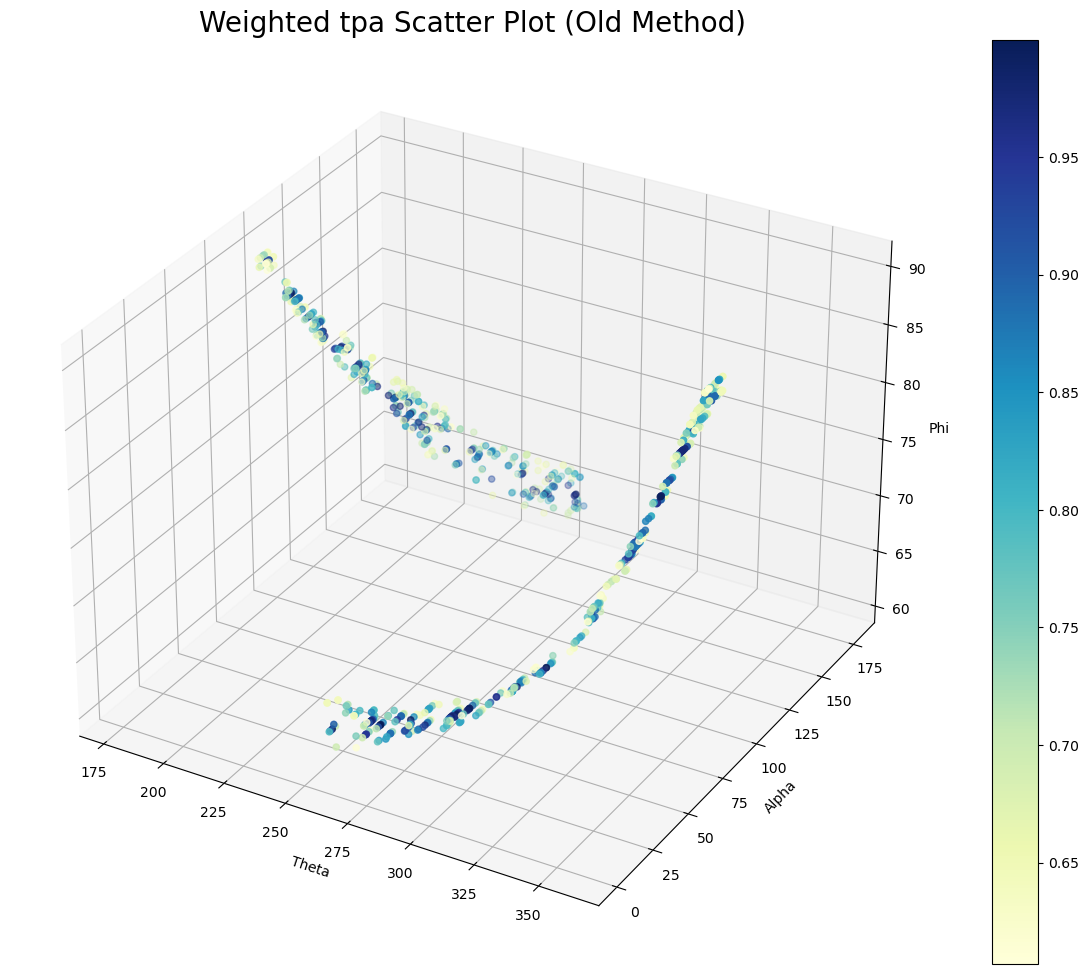

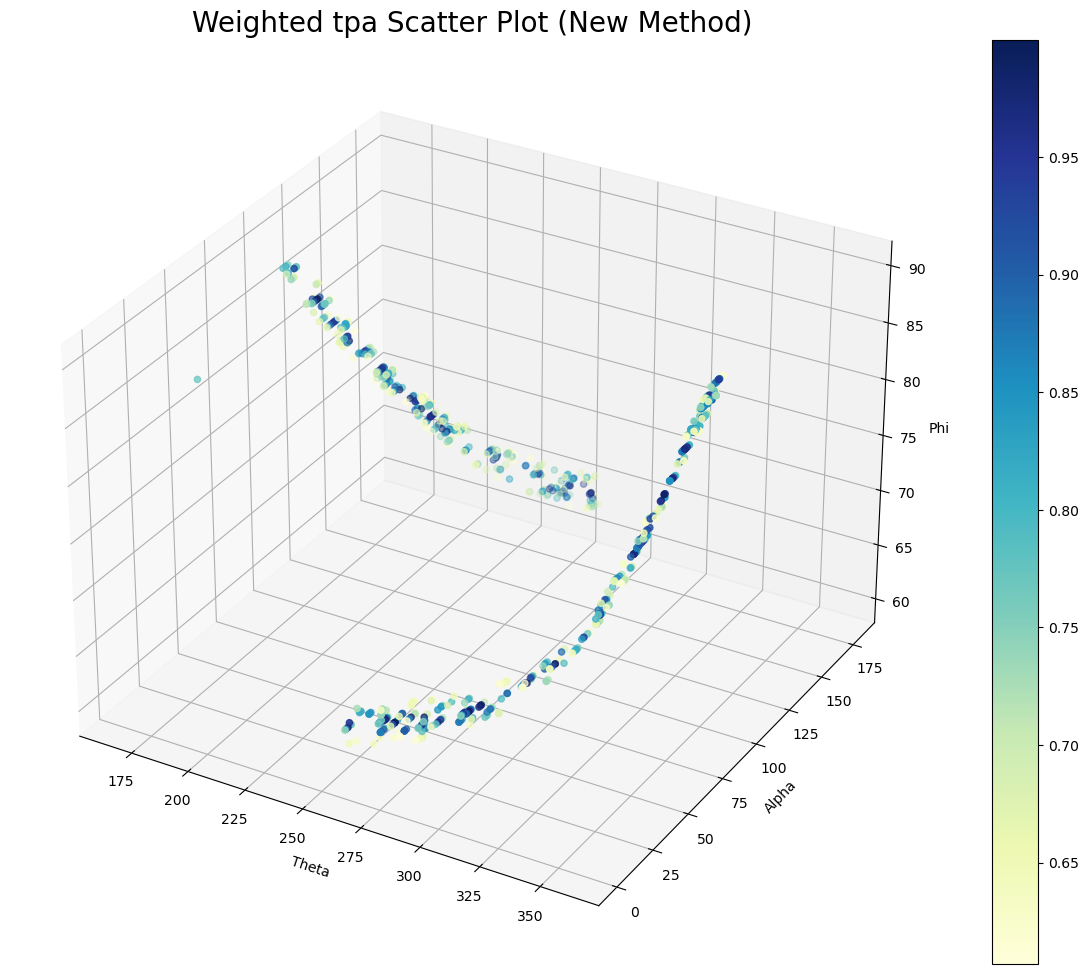

In [6]:
# 3D tpa scatter plot

fr.weighted_3D_scatter(df[old_accepted1], "OldWeight", type="tpa")
fr.weighted_3D_scatter(df[accepted1], "Weight", type="tpa")

# repeat patten/extend grid

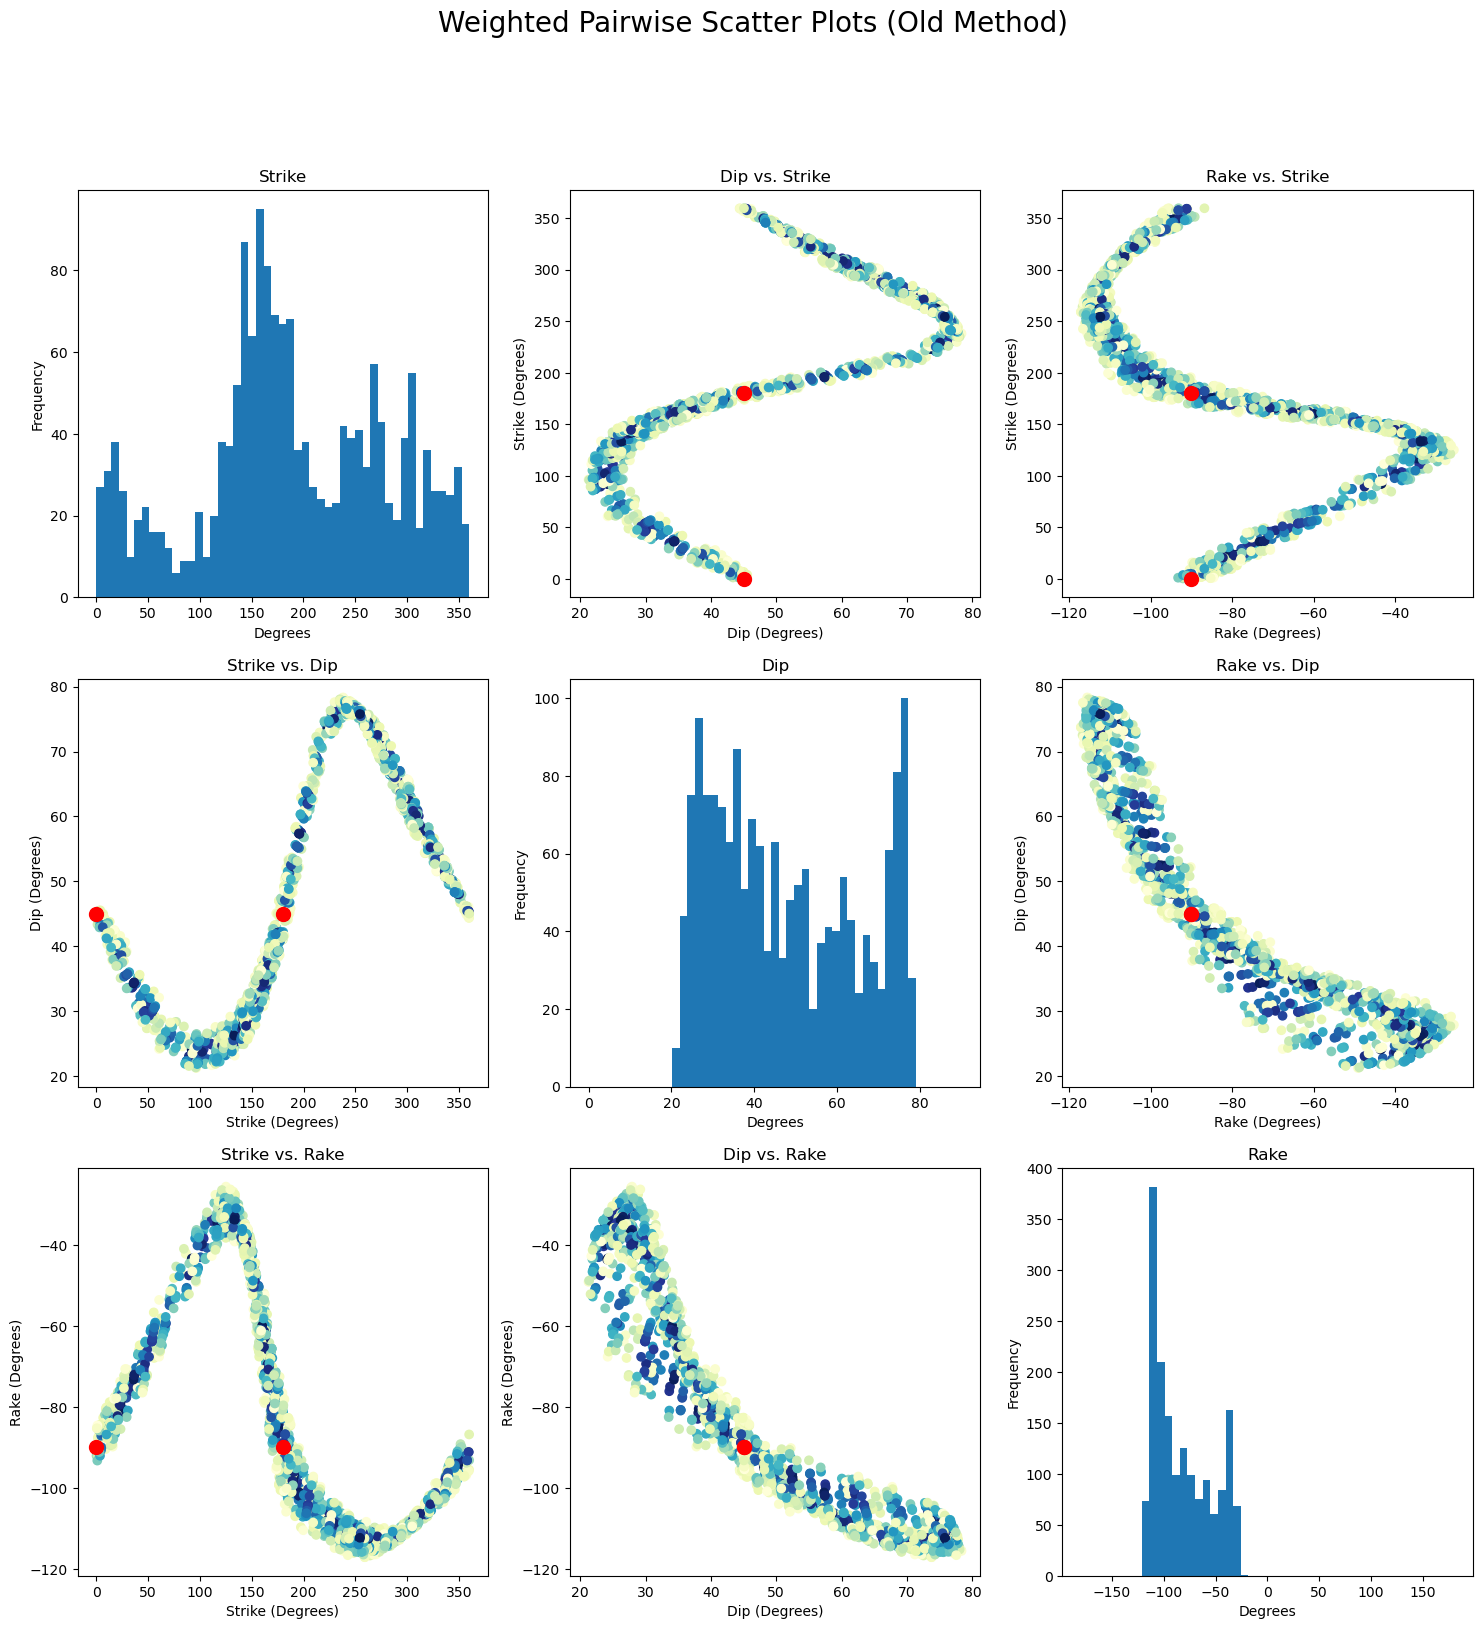

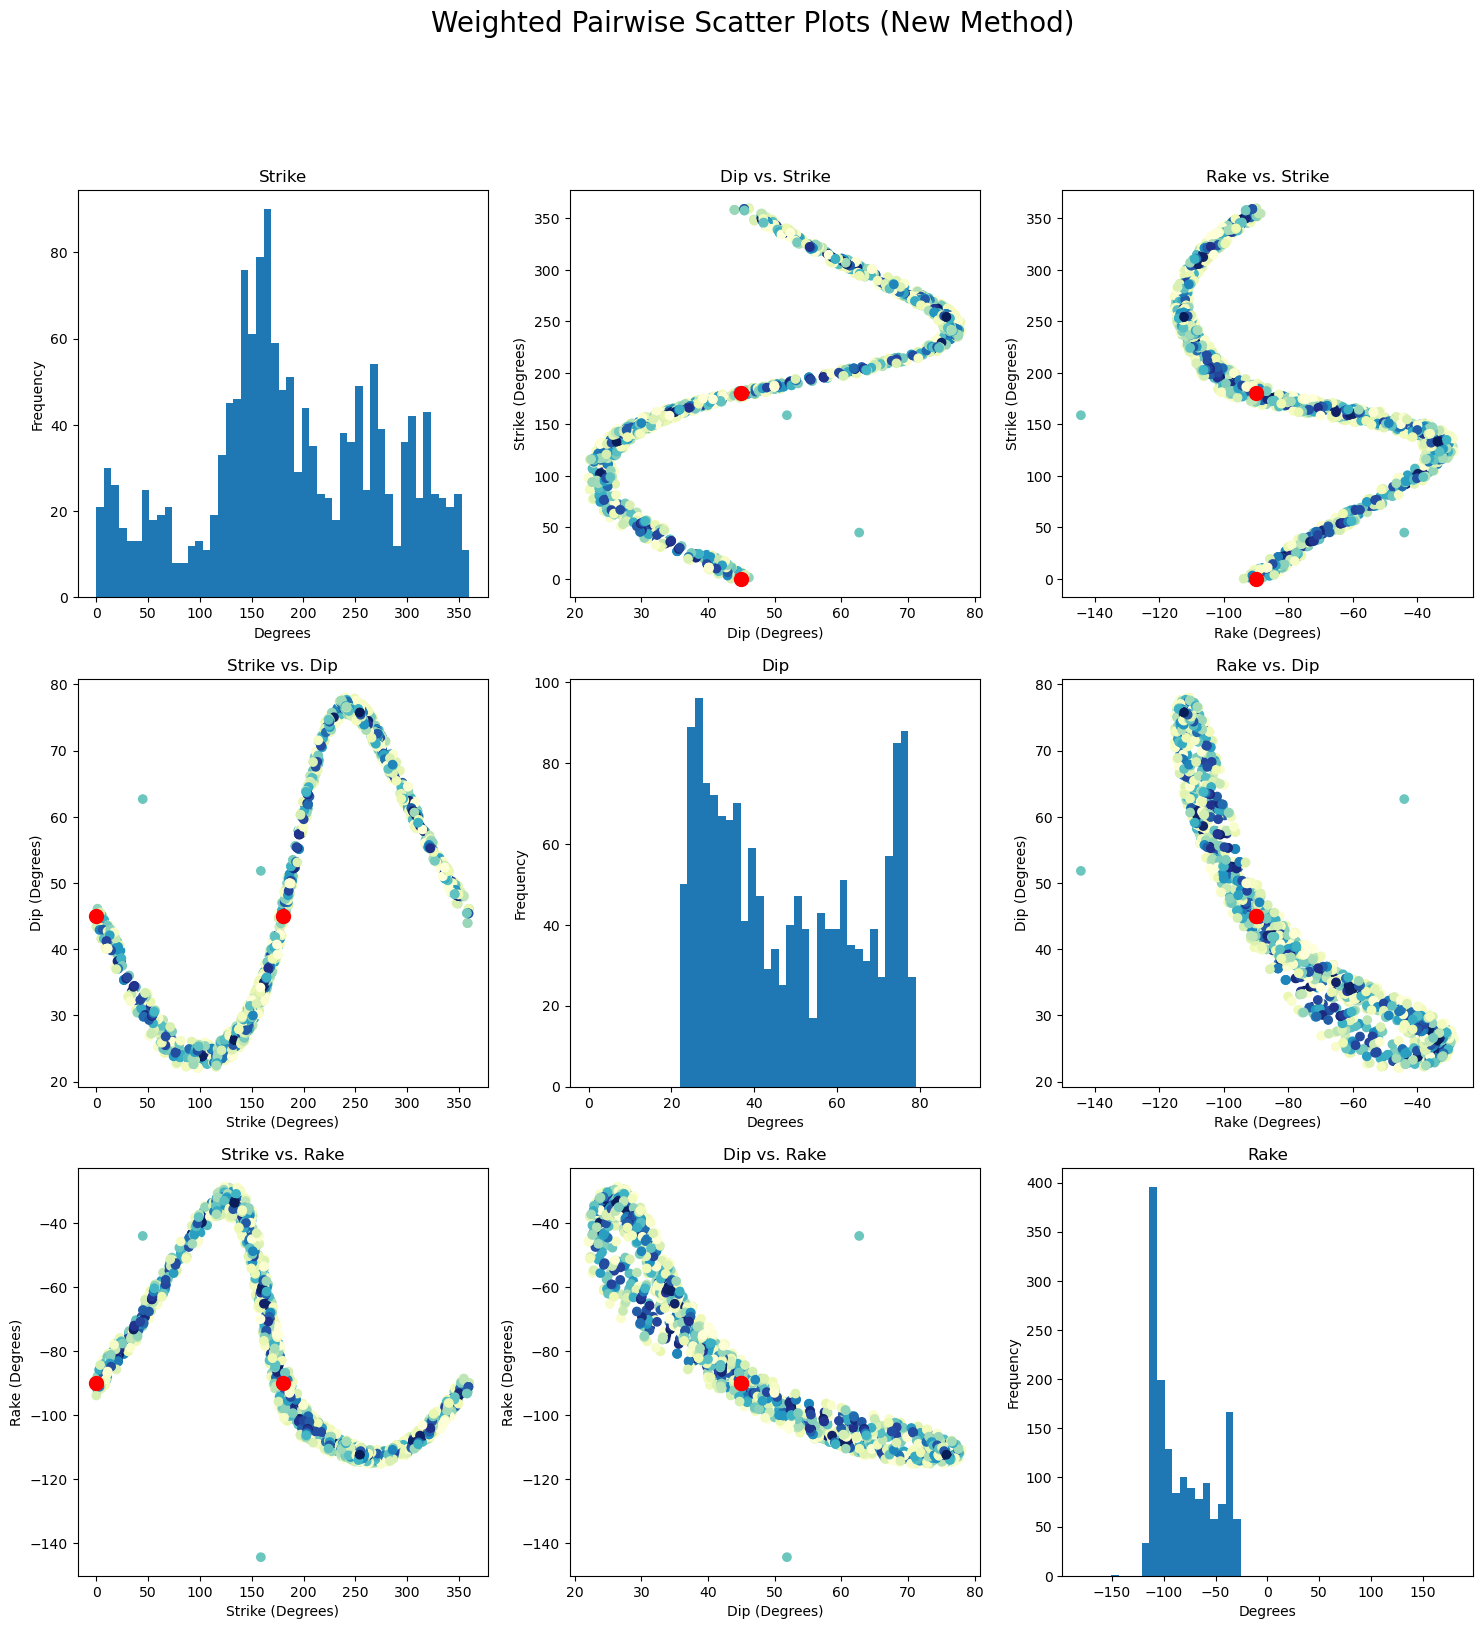

In [7]:
# grid of pairwise scatter plots
fr.weighted_pairwise_scatter(df[old_accepted1], "OldWeight", true_sol = normal_faults)
fr.weighted_pairwise_scatter(df[accepted1], "Weight", true_sol = normal_faults)

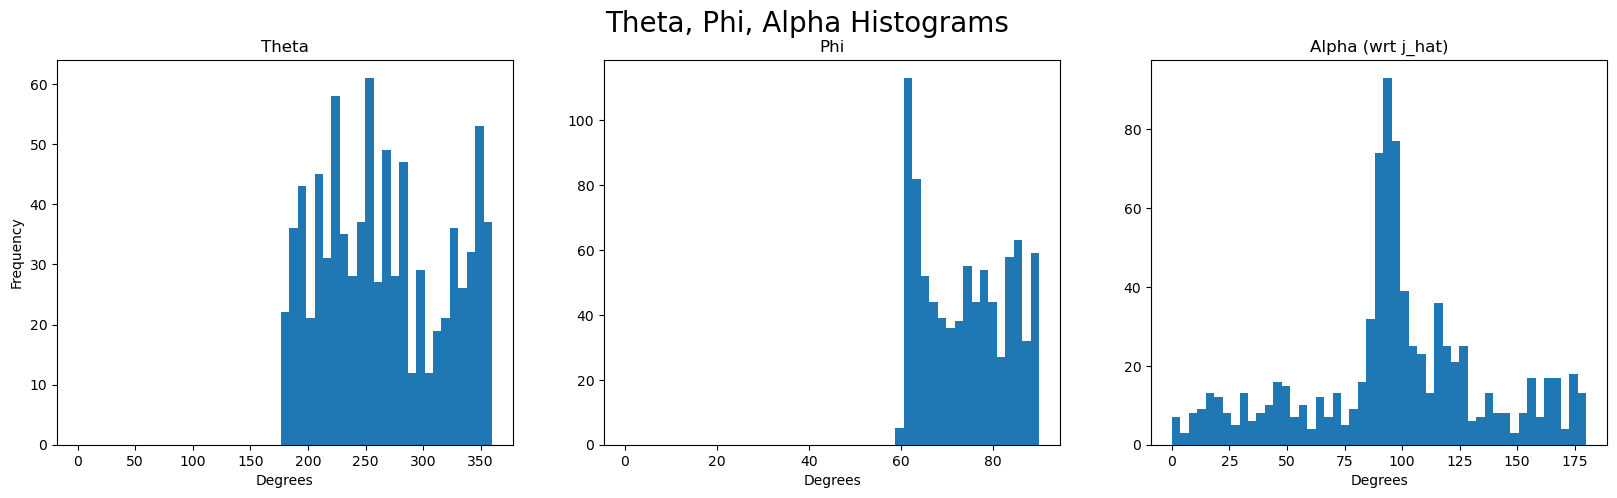

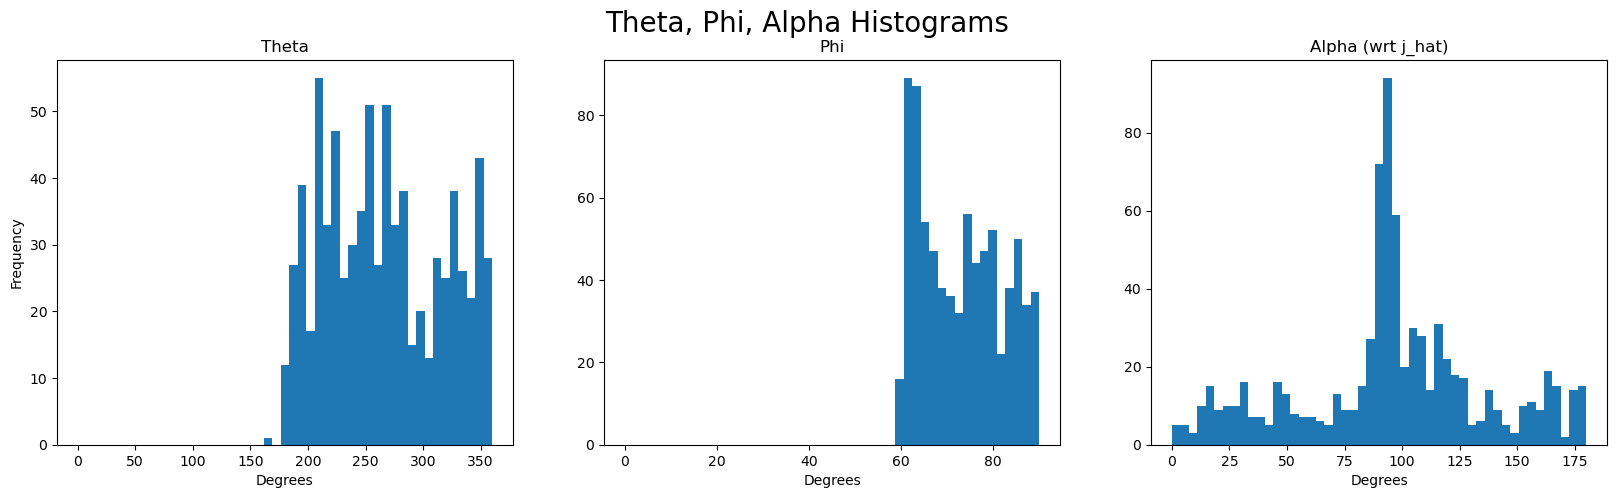

In [23]:
# grid of pairwise scatter plots
fr.weighted_pairwise_scatter(df[old_accepted1], "OldWeight", type="tpa")
fr.weighted_pairwise_scatter(df[accepted1], "Weight", type="tpa")

In [ ]:
# beachballs, consider weight
# omkar's code (GitHub)
# proper labelling of previous graphs

### Model comparisons

* What metrics can we use?
* Different ways of weighting
* Are s,d,r dependent?
* If not, to what extent does ... account for the dependencies?